## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


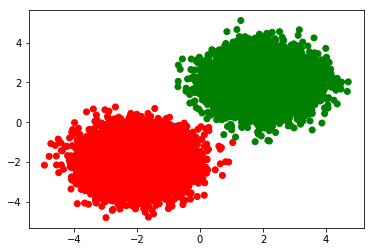

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-2.626701705747908, -1.73147055822531, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0         -2.626701705747908    -1.73147055822531     red
1        -1.6430266008226888   -2.244687681306508     red
2        -1.0060042613914988  -3.5199875412885087     red
3        -1.1286403569063295  -1.2507773163698506     red
4        -1.8236435578628307   -2.696877367449789     red
5        -3.1147823436653033  -2.2159097288149203     red
6        -2.6370986642718637  -1.9698650840585463     red
7        -1.5791839260066363  -1.6190788667538782     red
8          -3.34700191338084  -2.7740257267533472     red
9         -1.797290756142944   -1.505264311856544     red
10       -1.2661388740961972  -1.2636986681529843     red
11        -2.057592516815527  -1.6824580900463653     red
12       -1.7659735978314122  -2.3354678341876265     red
13       -3.5001753546041794  -2.3930997530355915     red
14        -2.324179820432235   -2.011055954644345     red
15        -1.828912548549978  -1.3623743696973853     red
16       -3.0827797644587522  -1.4635519950656906     red
17       -2.1343485658891224  -2.0690902174284256     red
18         -1.93397337720647  -0.2581719622565761     red
19       -0.9293036066314433  -1.9643312584414208     red
20       -0.8249789491046708  -1.2654029922548506     red
21     0.0057490994846198795  -1.4743007423904753     red
22        -2.658403215113365  -3.8571300117655167     red
23       -1.6949178238935356  -2.3200561248144873     red
24       -2.2789773601266465   -1.657402557283039     red
25       -2.8064959842409993    -2.07513400520463     red
26       -1.7223729748371155   -2.723042941758183     red
27        -2.475874249348303   -2.713424123237627     red
28       -3.1268454300472834  -1.8109751709771789     red
29       -3.5232008173511846  -1.8127686877028946     red
...                      ...                  ...     ...
19970     2.1707915680689043   2.8589931967546853   green
19971      2.061420516932095   1.4989113309050022   green
19972      2.056510279452604    1.199672473106009   green
19973     1.4407155189971694   1.6326552054508583   green
19974     3.3785007680244554   2.4589534649069265   green
19975     1.9250210920202944   2.5567140060499933   green
19976      3.456809909772387   1.3434283878222941   green
19977     2.2889690886140115   0.3708194057144303   green
19978     1.2018212045435985   2.3393621822327266   green
19979     2.1493311114143445   0.7361453844931494   green
19980     1.5299435091933422    4.228330203419669   green
19981     3.0925530710887634     2.63261938763807   green
19982     2.1928609327575814   2.1719571185570725   green
19983     3.3439889660405626   2.5511620509487725   green
19984     1.9097367767943918   1.6703029678344408   green
19985     1.6063350218663648    3.622208726818039   green
19986      2.278950162272112   1.2490276978557295   green
19987       2.44063318961805   3.0039546817239517   green
19988     2.0567395679078255    2.194431535940696   green
19989     0.7514852664208052   2.4416144675825433   green
19990      3.247502676220185   2.1803087331135234   green
19991     2.3383101383317824    2.361775196328392   green
19992      2.717134308373387   2.0615647426821178   green
19993       2.00646414468342   1.1861658007969007   green
19994     1.6057842207902193   3.1268760579039157   green
19995     0.8270498200602057   2.0612114123762915   green
19996     1.3788949474267027   1.2288206168433848   green
19997      3.603848298168997   1.5256377213902832   green
19998     1.8781267690152732   1.8946296620476781   green
19999     1.5517023511331685    1.104208213671232   green

[20000 rows x 3 columns]

## Création du modèle

In [44]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [45]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [46]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

[[0.8849335  0.11506654]]
Found :  0
Should be :  2


## Résumé du modèle (couche de neurones)

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 2s 95us/sample - loss: 0.1718 - acc: 0.9454 - val_loss: 0.0281 - val_acc: 1.0000
Epoch 2/10
16000/16000 [==============================] - 2s 111us/sample - loss: 0.0170 - acc: 0.9999 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 1s 93us/sample - loss: 0.0110 - acc: 0.9999 - val_loss: 0.0115 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 2s 100us/sample - loss: 0.0084 - acc: 0.9999 - val_loss: 0.0092 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 2s 95us/sample - loss: 0.0069 - acc: 0.9999 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 2s 100us/sample - loss: 0.0059 - acc: 0.9999 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 92us/sample - loss: 0.0053 - acc: 0.9999 - val_loss: 

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

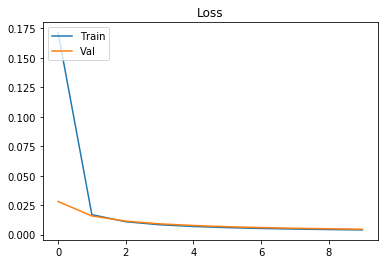

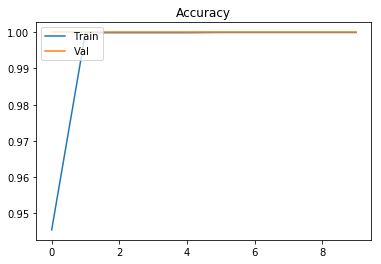

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[6.9409970e-04 9.9930584e-01]
 [9.9956900e-01 4.3101763e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5593106  0.44068933]
 [0.7389579  0.2610421 ]
 [0.8632741  0.13672592]]


['darkred', 'darkred', 'darkred']

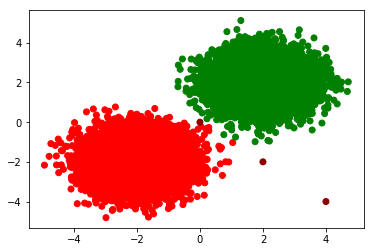

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 462us/sample - loss: 5.6274e-04 - acc: 1.0000
Test Loss 0.0005627392092719674
Test Accuracy 1.0


[[6.9409970e-04 9.9930584e-01]
 [9.9956900e-01 4.3101763e-04]]


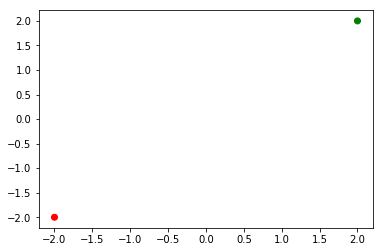

In [19]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


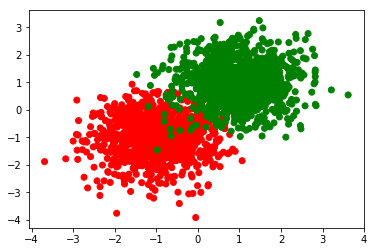

[[9.96718705e-01 3.28132487e-03]
 [9.83571410e-01 1.64286103e-02]
 [9.99389648e-01 6.10300514e-04]
 ...
 [4.86171152e-03 9.95138288e-01]
 [2.85405785e-01 7.14594245e-01]
 [1.28085585e-02 9.87191439e-01]]
2000/2000 [==============================] - 0s 53us/sample - loss: 0.1049 - acc: 0.9700
Test Loss 0.1048732272386551
Test Accuracy 0.97


In [20]:
nbr_points = 1000

abs1 = np.random.normal(-1,.75,nbr_points)
ord1 = np.random.normal(-1,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(1,.75,nbr_points)
ord2 = np.random.normal(1,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()

datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
# len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

model_output = model.predict(datas)
print(model_output)

loss, acc = model.evaluate(datas, labels)
print("Test Loss", loss)
print("Test Accuracy", acc)

## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [21]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

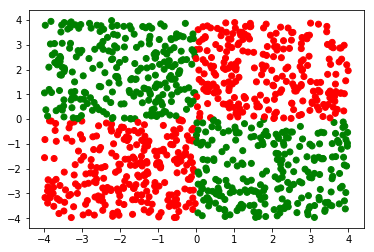

In [22]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [23]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [24]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [25]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[ 2.14559716 -2.82313313]]
[[0.32934406 0.6706559 ]]
Found :  green
Should be :  green


## Résumé du modèle (couches de neurones)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [27]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [28]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 237us/sample - loss: 0.6582 - acc: 0.6612 - val_loss: 0.6155 - val_acc: 0.6800
Epoch 2/10
800/800 [==============================] - 0s 77us/sample - loss: 0.6201 - acc: 0.6662 - val_loss: 0.5900 - val_acc: 0.6850
Epoch 3/10
800/800 [==============================] - 0s 126us/sample - loss: 0.5960 - acc: 0.6750 - val_loss: 0.5723 - val_acc: 0.7000
Epoch 4/10
800/800 [==============================] - 0s 62us/sample - loss: 0.5791 - acc: 0.7038 - val_loss: 0.5588 - val_acc: 0.7250
Epoch 5/10
800/800 [==============================] - 0s 51us/sample - loss: 0.5661 - acc: 0.7500 - val_loss: 0.5474 - val_acc: 0.7600
Epoch 6/10
800/800 [==============================] - 0s 121us/sample - loss: 0.5552 - acc: 0.7788 - val_loss: 0.5367 - val_acc: 0.7650
Epoch 7/10
800/800 [==============================] - 0s 102us/sample - loss: 0.5448 - acc: 0.7912 - val_loss: 0.5258 - val_acc: 0.8000
Epoch

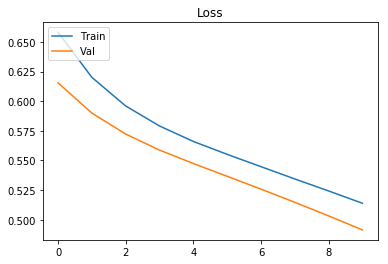

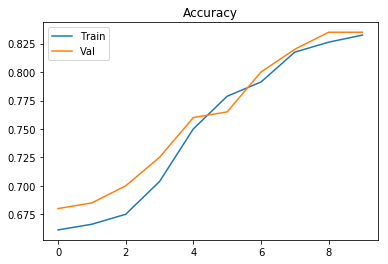

In [29]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Le modèle est-il bien entraîné ?

In [30]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [31]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 29us/sample - loss: 0.5217 - acc: 0.7870
Test Loss 0.521687008857727
Test Accuracy 0.787


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

In [32]:
history = model.fit(datas, labels, epochs=40, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/40
800/800 [==============================] - 0s 99us/sample - loss: 0.5031 - acc: 0.8388 - val_loss: 0.4793 - val_acc: 0.8500
Epoch 2/40
800/800 [==============================] - 0s 90us/sample - loss: 0.4921 - acc: 0.8425 - val_loss: 0.4671 - val_acc: 0.8550
Epoch 3/40
800/800 [==============================] - 0s 71us/sample - loss: 0.4812 - acc: 0.8550 - val_loss: 0.4552 - val_acc: 0.8600
Epoch 4/40
800/800 [==============================] - 0s 59us/sample - loss: 0.4706 - acc: 0.8612 - val_loss: 0.4435 - val_acc: 0.8650
Epoch 5/40
800/800 [==============================] - 0s 102us/sample - loss: 0.4603 - acc: 0.8662 - val_loss: 0.4322 - val_acc: 0.8650
Epoch 6/40
800/800 [==============================] - 0s 110us/sample - loss: 0.4504 - acc: 0.8700 - val_loss: 0.4214 - val_acc: 0.8700
Epoch 7/40
800/800 [==============================] - 0s 101us/sample - loss: 0.4409 - acc: 0.8750 - val_loss: 0.4108 - val_acc: 0.8700
Epoch 

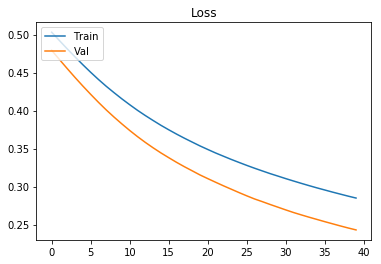

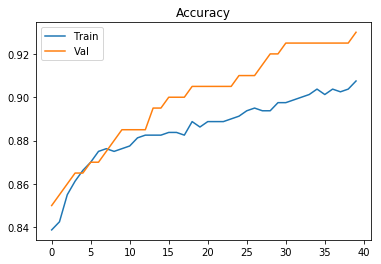

In [33]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [3]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

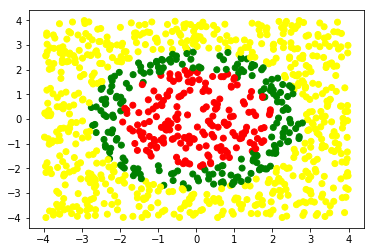

In [4]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [12]:
model = tf.keras.models.Sequential()

In [13]:
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [14]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

[[0.32036152 0.46704715 0.21259128]]
Found :  1
Should be :  0


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  18        
_________________________________________________________________
dense_3 (Dense)              multiple                  42        
_________________________________________________________________
dense_4 (Dense)              multiple                  21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [17]:
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 273us/sample - loss: 1.3573 - acc: 0.2475 - val_loss: 1.2094 - val_acc: 0.2850
Epoch 2/100
800/800 [==============================] - 0s 110us/sample - loss: 1.1633 - acc: 0.3137 - val_loss: 1.1031 - val_acc: 0.3700
Epoch 3/100
800/800 [==============================] - 0s 146us/sample - loss: 1.0677 - acc: 0.4025 - val_loss: 1.0448 - val_acc: 0.4100
Epoch 4/100
800/800 [==============================] - 0s 134us/sample - loss: 1.0098 - acc: 0.4363 - val_loss: 1.0084 - val_acc: 0.5050
Epoch 5/100
800/800 [==============================] - 0s 138us/sample - loss: 0.9711 - acc: 0.5763 - val_loss: 0.9838 - val_acc: 0.5800
Epoch 6/100
800/800 [==============================] - 0s 185us/sample - loss: 0.9435 - acc: 0.6263 - val_loss: 0.9661 - val_acc: 0.5800
Epoch 7/100
800/800 [==============================] - 0s 144us/sample - loss: 0.9230 - acc: 0.6263 - val_loss: 0.9529 - val_acc: 0.

800/800 [==============================] - 0s 136us/sample - loss: 0.5487 - acc: 0.7425 - val_loss: 0.5796 - val_acc: 0.7400
Epoch 61/100
800/800 [==============================] - 0s 139us/sample - loss: 0.5438 - acc: 0.7450 - val_loss: 0.5742 - val_acc: 0.7450
Epoch 62/100
800/800 [==============================] - 0s 145us/sample - loss: 0.5390 - acc: 0.7475 - val_loss: 0.5689 - val_acc: 0.7550
Epoch 63/100
800/800 [==============================] - 0s 135us/sample - loss: 0.5344 - acc: 0.7538 - val_loss: 0.5639 - val_acc: 0.7550
Epoch 64/100
800/800 [==============================] - 0s 127us/sample - loss: 0.5299 - acc: 0.7550 - val_loss: 0.5589 - val_acc: 0.7550
Epoch 65/100
800/800 [==============================] - 0s 151us/sample - loss: 0.5254 - acc: 0.7613 - val_loss: 0.5541 - val_acc: 0.7550
Epoch 66/100
800/800 [==============================] - 0s 142us/sample - loss: 0.5209 - acc: 0.7638 - val_loss: 0.5496 - val_acc: 0.7600
Epoch 67/100
800/800 [=========================

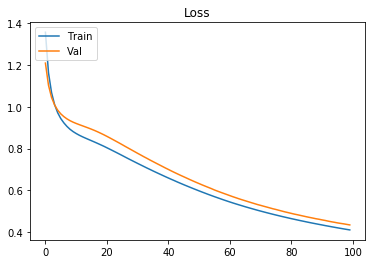

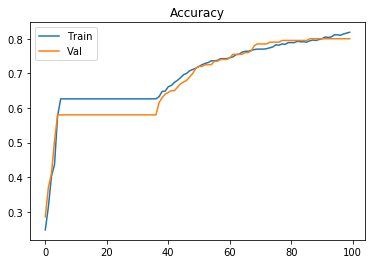

In [18]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()